## Parametry

In [1]:
MODEL_NAME = "trained_model_type2.h5"
LEARNING_RATE = 0.001

## Wczytanie modelu z pliku

In [2]:
from tensorflow.keras.models import load_model
from tensorflow_core.python.keras.optimizer_v2.rmsprop import RMSProp
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import LeakyReLU
from script.main.loss_functions import *

model = load_model('../resources/%s' % MODEL_NAME, compile=False, custom_objects={'LeakyReLU': LeakyReLU})
model.compile(loss=mean_proportional_loss_func, optimizer=Adam(lr=LEARNING_RATE), metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 71, 37)            11100     
_________________________________________________________________
lstm_1 (LSTM)                (None, 71, 37)            11100     
_________________________________________________________________
lstm_2 (LSTM)                (None, 37)                11100     
_________________________________________________________________
dense (Dense)                (None, 19)                722       
Total params: 34,022
Trainable params: 34,022
Non-trainable params: 0
_________________________________________________________________


## Wczytanie danych testowych z pliku

In [3]:
import numpy as np

X_test = np.load("../resources/test_data/X_test.npy")
Y_test = np.load("../resources/test_data/Y_test.npy")
test_series = np.load("../resources/data_float16_series_327_compression_113.npy")

## Wyliczenie prognoz na 72h wprzód

In [4]:
#### print(test_series.shape)
preds = np.array(test_series, copy=True)
for i in range(72):
    print(i)
    preds[:,72+i,:19] =  model.predict(preds[:,i:71+i,:])[:,:19]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


## Porównanie z prawdziwymi pomiarami i wyliczenie błędów

### Średni błąd całego wektora

(15182, 327, 37)
[0.15124512 0.15063477 0.19873047 0.19995117 0.23376465 0.23620605
 0.26074219 0.26196289 0.2800293  0.28100586 0.29418945 0.29858398
 0.3059082  0.31152344 0.31567383 0.32324219 0.32641602 0.33447266
 0.33764648 0.34448242 0.35009766 0.35668945 0.36621094 0.3659668
 0.38647461 0.38061523 0.40332031 0.39624023 0.41943359 0.41333008
 0.43725586 0.43066406 0.45141602 0.44897461 0.46655273 0.46582031
 0.47949219 0.48266602 0.49291992 0.4987793  0.50634766 0.51464844
 0.52197266 0.52734375 0.53808594 0.54003906 0.55419922 0.55175781
 0.57177734 0.56201172 0.58496094 0.57617188 0.59814453 0.58789062
 0.60791016 0.60058594 0.6171875  0.61328125 0.62744141 0.62597656
 0.63623047 0.63769531 0.64404297 0.64648438 0.65185547 0.65576172
 0.66064453 0.66113281 0.66845703 0.66748047 0.67724609 0.67041016]


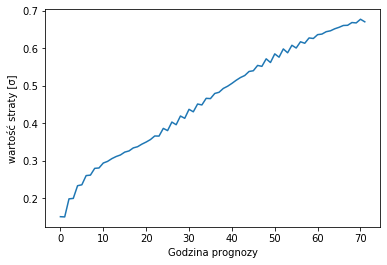

In [5]:
import matplotlib.pyplot as plt
from script.main.loss_functions import *
print(preds.shape)
losses = np.zeros(72)

for i in range(72):  
    losses[i]  = error_on_series(preds[:,72+i,:], test_series[:,72+i,:])
print(losses)
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd opadów

[0.24707031 0.24975586 0.24279785 0.25195312 0.25048828 0.26806641
 0.26586914 0.265625   0.27246094 0.25512695 0.26782227 0.27148438
 0.2722168  0.2734375  0.27539062 0.27246094 0.27392578 0.28076172
 0.27124023 0.26635742 0.26635742 0.27368164 0.26733398 0.26000977
 0.27929688 0.27978516 0.27539062 0.27758789 0.26928711 0.28466797
 0.28125    0.27807617 0.26928711 0.28076172 0.26806641 0.25854492
 0.26293945 0.25927734 0.27197266 0.27050781 0.26171875 0.2590332
 0.25732422 0.26782227 0.27172852 0.26831055 0.26904297 0.27661133
 0.27441406 0.26831055 0.26733398 0.27050781 0.27075195 0.26660156
 0.2590332  0.26953125 0.26391602 0.27709961 0.27368164 0.27441406
 0.28515625 0.28393555 0.28198242 0.27832031 0.28027344 0.29858398
 0.28637695 0.28662109 0.29003906 0.29663086 0.28564453 0.28515625]


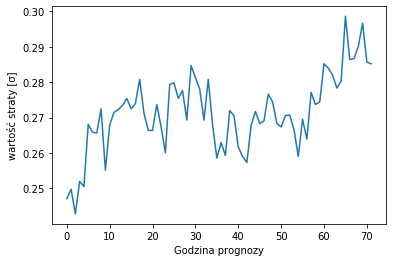

In [6]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_rain(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)
print(losses)
plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd temperatury

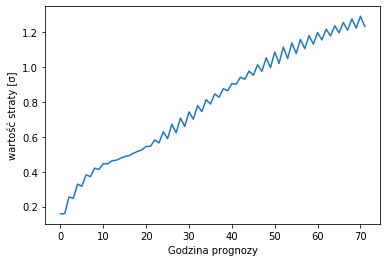

In [7]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_temp(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na Wet Bulb

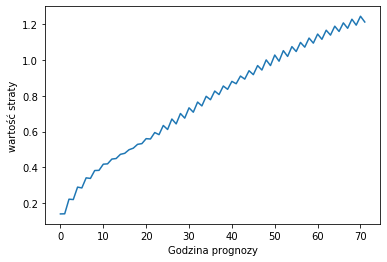

In [8]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_wetb(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses, label = "WTB")

plt.ylabel('wartość straty')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd temperatury w punkcie rosy

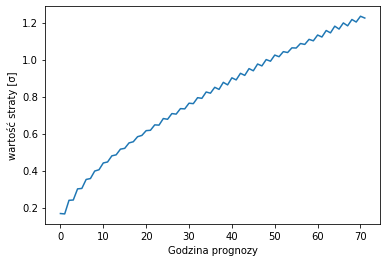

In [9]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_dewpt(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd wilgotności

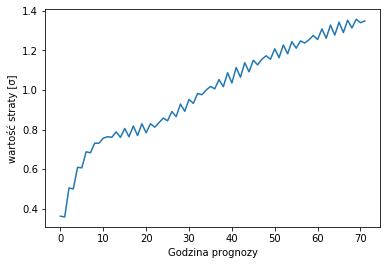

In [10]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_rhum(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na cisnieniu

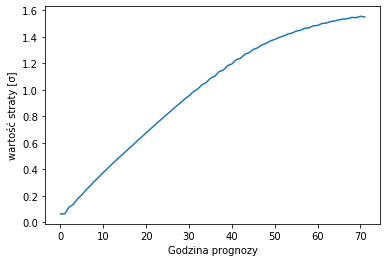

In [11]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_msl(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na prędkości wiatru

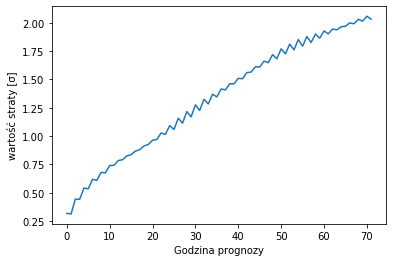

In [12]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_wdsp(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na nasłonecznieniu

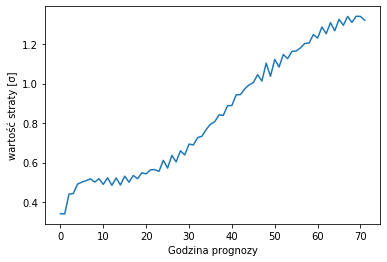

In [13]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_sun(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na widoczności

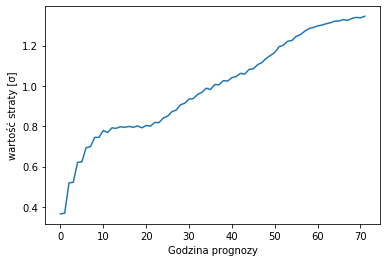

In [14]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_vis(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na kodzie synoptycznym

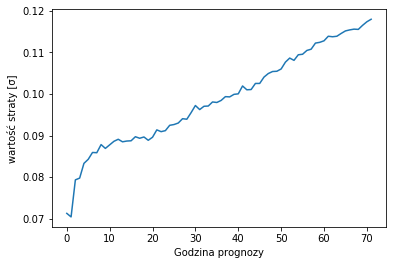

In [15]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_weather_code(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Wszystkie poarametry naraz

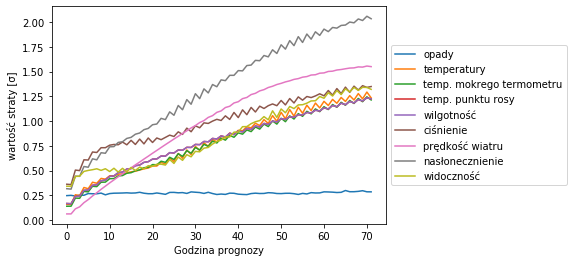

In [16]:
names = ['opady', 'temperatury', 'temp. mokrego termometru', 'temp. punktu rosy', 'wilgotność', 'ciśnienie', 
         'prędkość wiatru', 'nasłonecznienie', 'widoczność', 'kod synoptyczny']
functs = [error_on_rain, error_on_temp, error_on_wetb, error_on_dewpt, error_on_dewpt,
          error_on_rhum, error_on_msl, error_on_wdsp, error_on_sun, error_on_vis, error_on_weather_code]

for param in range(9):
    losses = np.zeros(72)
    for i in range(72):
        losses[i]  = functs[param](preds[:,72+i,:], test_series[:,72+i,:])
    plt.plot(range(0,72), losses, label = names[param])



plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()




### Porównanie błędu w miesiącach

In [17]:
names = ['styczeń-luty', 'marzeck-kwieceiń', 'maj-czerwiec', 'lipiec-sierpień', 'wrzesień-październik', 'listopad-grudzień']
functs = [filter_jan_feb, filter_mar_apr, filter_may_jun, filter_jul_aug, filter_sep_oct, filter_nov_dec]
for param in range(6):
    month_preds = preds[np.where(functs[param](preds))]
    month_vals = test_series[np.where(functs[param](test_series))]
    losses = np.zeros(72)
    for i in range(72):
        losses[i]  = error_on_series(month_preds[:,72+i,:] , month_vals[:,72+i,:])
    plt.plot(range(0,72), losses, label = names[param])



plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

ValueError: operands could not be broadcast together with shapes (133,19) (191,19) 

### Ewaluacja testowego błędu

In [ ]:
results = model.evaluate(X_test, Y_test, batch_size=32)
print('test loss, test acc:', results)